# Checkpoint ML

### Importação e Montagem do Dataset

In [1]:
# Import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, recall_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Carregar os dados 
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels, (569, 1))

In [3]:
# Finalização da montagem do dataset
final = np.concatenate( [breast_data, labels], axis=1 )
colunas = list(breast.feature_names)
colunas.append("label")

df = pd.DataFrame(final, columns=colunas)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


### Análises preliminares

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Não há dados missing e o tipo das colunas já está como numérico

In [5]:
df['label'].value_counts(normalize=True)

1.0    0.627417
0.0    0.372583
Name: label, dtype: float64

### A variável resposta está um pouco desequilibrada na base mas como a diferença não é tão grande vamos seguir assim

In [6]:
X = df.drop(columns=["label"])
y = df['label']

### Separação em treino e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Padronização dos dados

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Fit apenas na base de treino para obter a escala da normalização
X_test_scaled = scaler.transform(X_test) # e transform na de teste para utilizar a mesma escala 

### Aplicação do PCA gerando 10 bases uma para cada variação de componentes principais

In [9]:
for n in range(1,11,1): 
    print(f'Variavel: {n}')
    n_componentes=n
    pca = PCA(n_components=n_componentes)
    
    #base treino
    pca_breast_train = pca.fit_transform(X_train_scaled)
    X_train_scaled_pca = pd.DataFrame(pca_breast_train,
                          columns=[str(i+1)+"ª CP" for i in range (n_componentes)])
    #base teste
    pca_breast_test = pca.transform(X_test_scaled)
    X_test_scaled_pca = pd.DataFrame(pca_breast_test,
                          columns=[str(i+1)+"ª CP" for i in range (n_componentes)])
    
    #Modelo de regressão logística
    clf = LogisticRegression(random_state=0).fit(X_train_scaled_pca, y_train)
    print("Acurácia: ",clf.score(X_test_scaled_pca ,y_test))
    print("Recall: ",recall_score(clf.predict(X_test_scaled_pca) ,y_test))
    print("-------------------------------------------------------------------------------------------------------------")

Variavel: 1
Acurácia:  0.9473684210526315
Recall:  0.9333333333333333
-------------------------------------------------------------------------------------------------------------
Variavel: 2
Acurácia:  0.9912280701754386
Recall:  0.9861111111111112
-------------------------------------------------------------------------------------------------------------
Variavel: 3
Acurácia:  0.9824561403508771
Recall:  0.9726027397260274
-------------------------------------------------------------------------------------------------------------
Variavel: 4
Acurácia:  0.9736842105263158
Recall:  0.9722222222222222
-------------------------------------------------------------------------------------------------------------
Variavel: 5
Acurácia:  0.9824561403508771
Recall:  0.9859154929577465
-------------------------------------------------------------------------------------------------------------
Variavel: 6
Acurácia:  0.9824561403508771
Recall:  0.9859154929577465
------------------------------

### Foram utilizadas as métricas de acurácia para avaliar a assertividade total do modelo de regressão logística e o recall por se tratar de um modelo voltado para saúde, no qual é importante saber dos positivos quantos de fato foram classificados dessa forma.

### Os resultados com dois componentes principais apresentaram excelentes resultados. O de 8 CPs também, mas optaremos em seguir com o de 2 para tornar o modelo mais simples

In [10]:
n_componentes=2
pca = PCA(n_components=n_componentes)

#base treino
pca_breast_train = pca.fit_transform(X_train_scaled)
X_train_scaled_pca = pd.DataFrame(pca_breast_train,
                      columns=[str(i+1)+"ª CP" for i in range (n_componentes)])
#base teste
pca_breast_test = pca.transform(X_test_scaled)
X_test_scaled_pca = pd.DataFrame(pca_breast_test,
                      columns=[str(i+1)+"ª CP" for i in range (n_componentes)])

### Modelo de regressão logística

In [11]:
def logistic_regression(x_train,y_train,x_test,y_test):
    clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
    return print("Acurácia: ",clf.score(x_test ,y_test)),print("Recall: ",recall_score(clf.predict(x_test) ,y_test)), disp.plot(),plt.show()

Acurácia:  0.9912280701754386
Recall:  0.9861111111111112


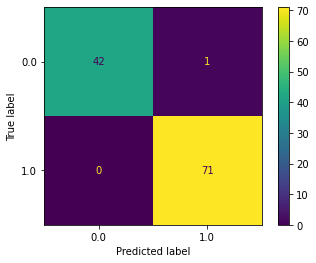

In [12]:
logistic_regression(X_train_scaled_pca,y_train,X_test_scaled_pca,y_test);

### Support Vector Machine

In [13]:
def svm_model(x_train,y_train,x_test,y_test):
    clf_svm = svm.SVC(kernel='linear',max_iter=40000) #Foi aumentado o máximo de interações a fim de melhorar o desempenho
    clf_svm.fit(x_train, y_train)
    y_pred_svm = clf_svm.predict(x_test)
    cm = confusion_matrix(y_test, y_pred_svm, labels=clf_svm.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svm.classes_)
    return print("Acurácia: ",clf_svm.score(x_test ,y_test)),print("Recall: ",recall_score(clf_svm.predict(x_test) ,y_test)), disp.plot(),plt.show()

Acurácia:  0.9912280701754386
Recall:  0.9861111111111112


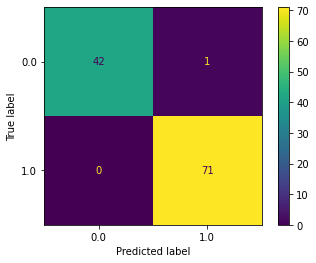

In [14]:
svm_model(X_train_scaled_pca,y_train,X_test_scaled_pca,y_test);

### Modelo de Random Forest

In [15]:
def rf_model(x_train,y_train,x_test,y_test):
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    y_pred_rf=rfc.predict(x_test)
    cm = confusion_matrix(y_test, y_pred_rf, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
    return print("Acurácia: ",rfc.score(x_test ,y_test)),print("Recall: ",recall_score(rfc.predict(x_test) ,y_test)), disp.plot(),plt.show()

Acurácia:  0.9824561403508771
Recall:  0.9726027397260274


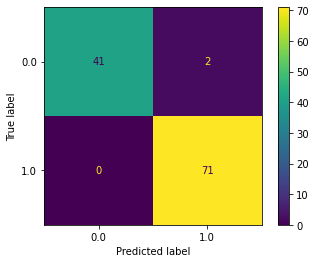

In [16]:
rf_model(X_train_scaled_pca,y_train,X_test_scaled_pca,y_test);

### O modelo de regressão logística por ter sido o modelo de mais fácil explicação e um dos que obteve o melhor resultado na base de PCA com 2 componentes principais. poderia ser o escolhido para este tipo de problema.

Acurácia:  0.9912280701754386
Recall:  0.9861111111111112


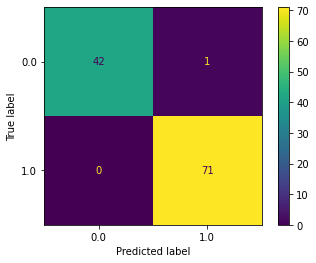

In [17]:
logistic_regression(X_train_scaled_pca,y_train,X_test_scaled_pca,y_test);